<a href="https://colab.research.google.com/github/ghdiez/Inmersion/blob/main/German_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar Librerías y Cargar Datos

In [ ]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import warnings

# Montar Google Drive
drive.mount('/content/Drive')
warnings.filterwarnings("ignore")

# Cargar los datos
file_path = '/content/Drive/MyDrive/Inmersion/german_credit.csv'  # Asegúrate de cargar el archivo en Google Colab
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
data.head()


Mounted at /content/Drive


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


**Preparación de los datos**

Análisis Inicial de los Datos

In [ ]:
# Información básica del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int8 
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int8 
 4   purpose                     1000 non-null   int8 
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int8 
 7   present_emp_since           1000 non-null   int8 
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int8 
 10  other_debtors               1000 non-null   int8 
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int8 
 13  age                         1000 non-null   int64
 14  other_ins

Estadísticas Descriptivas

In [ ]:
# Estadísticas descriptivas
data.describe()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,1.582000,20.903000,2.219000,3.620000,3271.258000,1.730000,1.620000,2.973000,1.878000,...,2.845000,1.358000,35.546000,0.908000,1.071000,1.407000,1.274000,1.155000,0.404000,0.963000
std,0.458487,1.253334,12.058814,1.064035,2.165246,2822.736876,1.232322,1.209571,1.118715,1.350904,...,1.103718,1.001418,11.375469,0.421561,0.531264,0.577654,0.946478,0.362086,0.490943,0.188856
min,0.000000,0.000000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,1.000000,2.000000,1365.500000,1.000000,0.000000,2.000000,0.000000,...,2.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,18.000000,3.000000,4.000000,2319.500000,1.000000,2.000000,3.000000,3.000000,...,3.000000,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,24.000000,3.000000,4.000000,3972.250000,2.000000,2.000000,4.000000,3.000000,...,4.000000,2.000000,42.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,72.000000,4.000000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000


evisión de Valores Nulos

In [ ]:
# Revisión de valores nulos
data.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

Mapa de Calor de Correlación[texto del vínculo](https://)

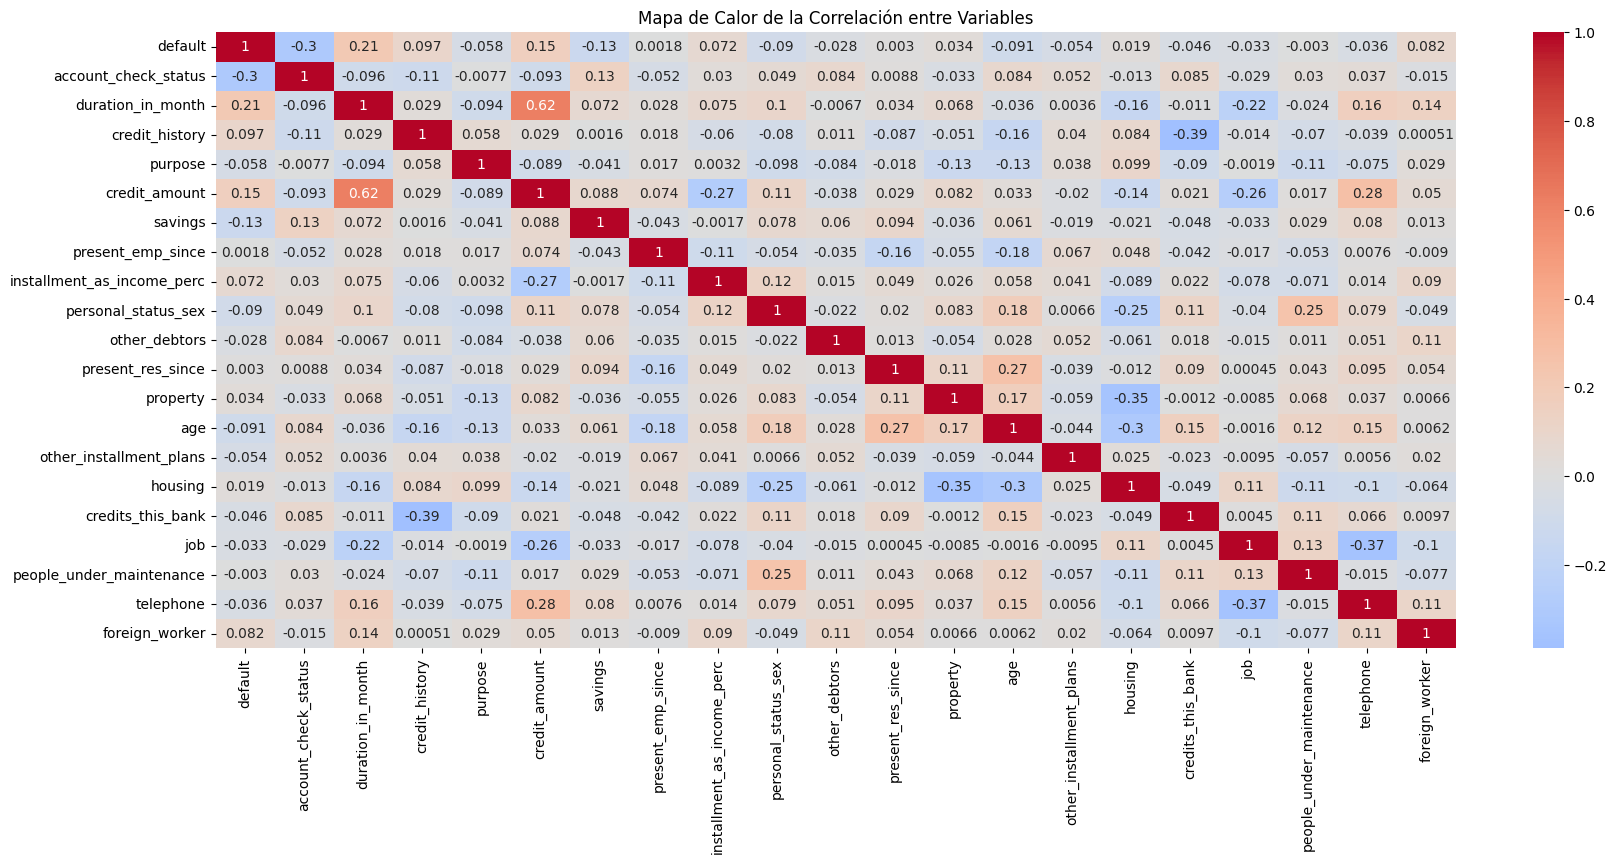

In [ ]:
# Convertir columnas no numéricas a categóricas
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear el mapa de calor
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()


Histogramas y Conclusiones

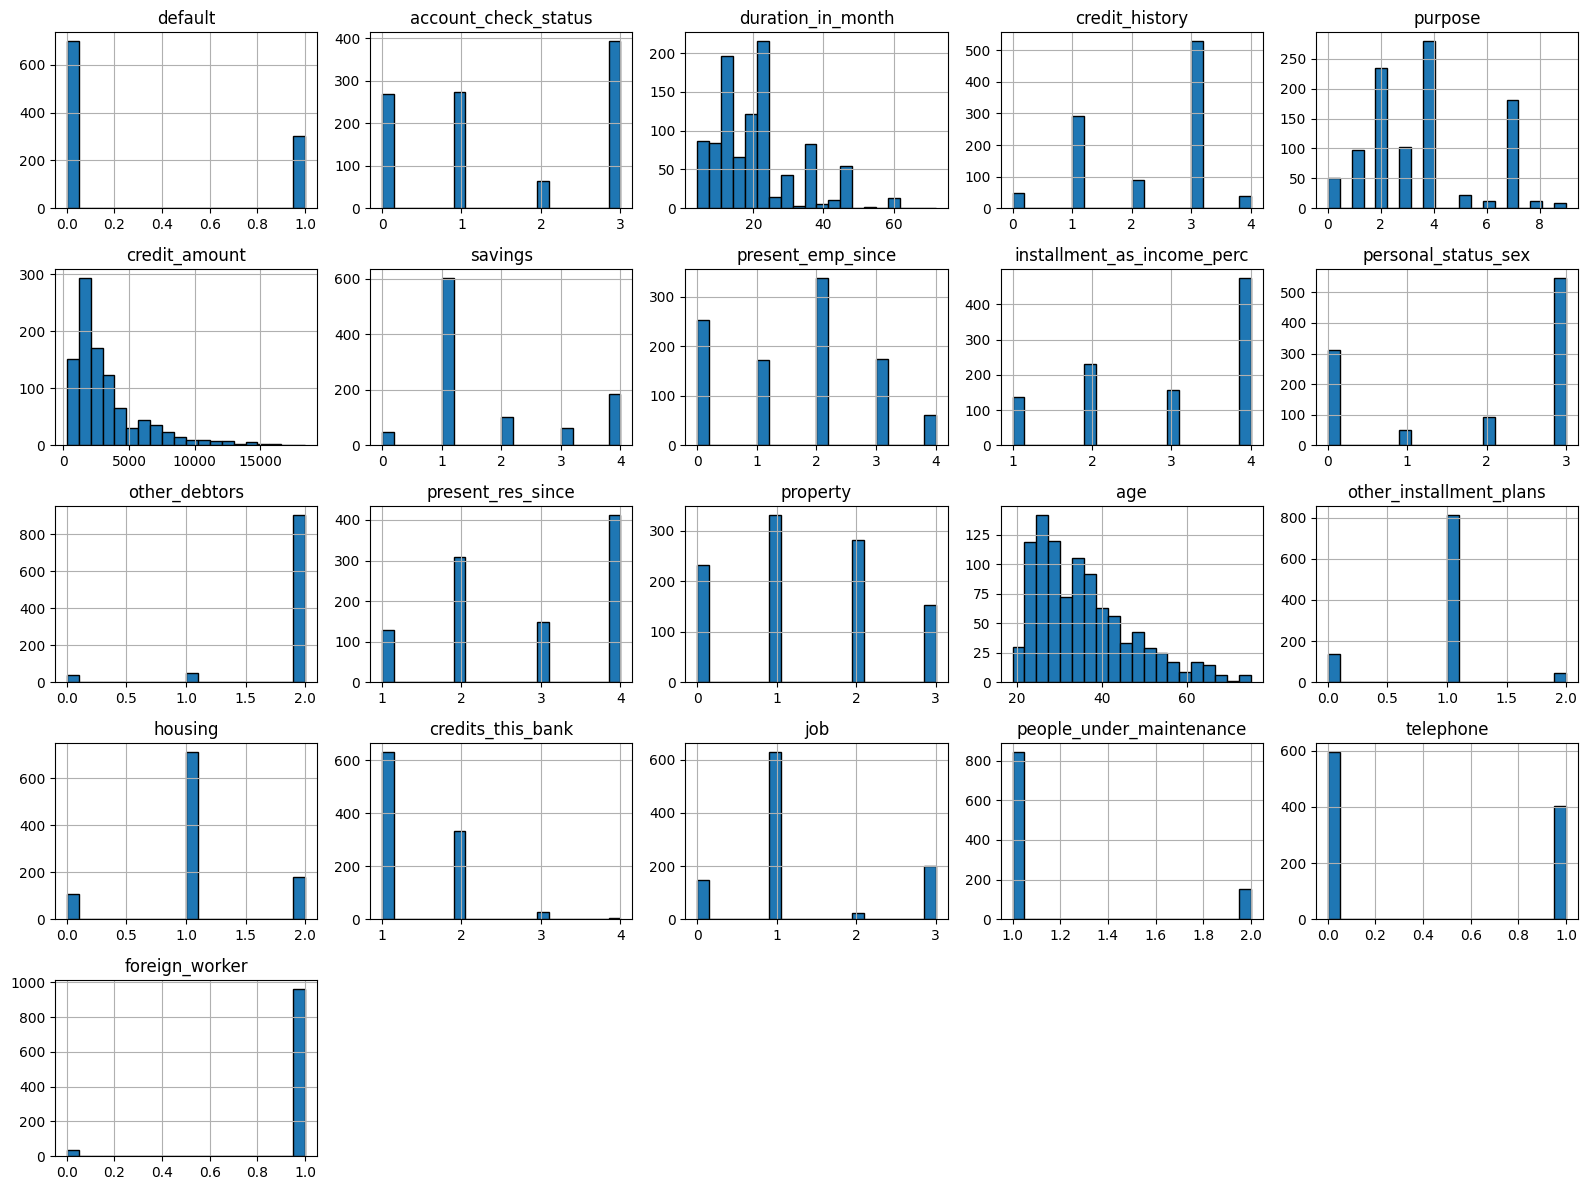

In [ ]:
# Crear histogramas para cada columna numérica
data.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


**Conclusiones**

**Concepto de Sesgo en Distribuciones**

Una distribución sesgada indica que los datos no están distribuidos simétricamente alrededor de la media. Los tipos de sesgo son:

**Sesgo a la derecha (positiva)**: La cola de la distribución se extiende más hacia la derecha. Esto significa que hay una mayor concentración de valores bajos y algunos valores excepcionalmente altos.

**Ejemplo**: Ingresos en una población donde la mayoría gana menos pero hay algunos con ingresos muy altos.
Sesgo a la izquierda (negativa): La cola de la distribución se extiende más hacia la izquierda. Esto significa que hay una mayor concentración de valores altos y algunos valores excepcionalmente bajos.

**Ejemplo**: Edad de jubilación en una empresa donde la mayoría se jubila a una edad alta, pero hay algunos que se jubilan muy temprano.
Análisis de Correlaciones
En el mapa de calor, se observaron las correlaciones entre las variables numéricas. A continuación, se indican las correlaciones más relevantes:

**duration_in_month y credit_amount**:

Correlación moderada positiva (0.49).
Los préstamos de mayor duración tienden a ser de mayor cantidad.
installment_as_income_perc y duration_in_month:

**Correlación negativa notable** (-0.21).
Los préstamos de mayor duración tienden a representar un porcentaje menor del ingreso mensual.
age y credit_amount:

**Correlación ligera positiva** (0.21).
Los prestatarios mayores tienden a solicitar mayores cantidades de crédito.
Profundización del Resumen del Análisis
Datos Limpios:

No se encontraron valores nulos en el dataset, lo que simplifica el preprocesamiento de datos.
Outliers:

Las distribuciones sesgadas en duration_in_month y credit_amount sugieren la presencia de valores atípicos.
Estos outliers deben ser revisados y potencialmente tratados (por ejemplo, mediante el uso de técnicas de escalado o eliminación) para no afectar negativamente los modelos predictivos.

**Correlaciones**:

Algunas variables muestran correlaciones que podrían ser importantes para modelos predictivos.
duration_in_month y credit_amount tienen una correlación moderada, indicando que la duración del préstamo es un factor significativo en el monto del crédito.
Las correlaciones negativas, como entre installment_as_income_perc y duration_in_month, podrían indicar que los préstamos a más largo plazo tienden a ser más manejables en términos de porcentaje del ingreso mensual comprometido.
Distribuciones:

**default**: La mayoría de los clientes no incumplen con sus pagos, lo cual es bueno para el banco pero podría requerir balanceo en modelos predictivos.
duration_in_month y credit_amount: Muestran distribuciones sesgadas a la derecha, indicando que la mayoría de los préstamos son de menor cantidad y duración, con algunos préstamos significativamente mayores en ambos aspectos.
age: La distribución muestra que la mayoría de los prestatarios son adultos jóvenes, con pocos prestatarios en edades muy avanzadas.
installment_as_income_perc y present_res_since: Tienen distribuciones más uniformes, lo que sugiere una diversidad en los porcentajes de ingresos destinados a cuotas y en el tiempo de residencia actual.